# TUGAS 1 METODE NUMERIK KULIAH
### Computer Problems
### From book Scientific Computing, Michael T. Heath, 2nd Ed. 2004, pages 45 - 47
```Nama: Antonius Aditya Rizky Wijaya```

```NIM: G54022221003```

<hr style="border:2px solid black"> </hr>

#### __1.4__
Write a program to compute the mathematical constant $e$, the base of natural logarithms, from the definition
$$ e =\lim_{n\to ∞}⁡ (1 + 1/n)^n $$

Specifically, compute $(1 + 1/n)^n$ for $n = 10^k$, $k = 1, 2, ... , 20$. If the programming language you use does not have an operator for exponentiation, you may use the equivalent formula
$$ (1 + 1/n)^n = exp(nlog(1 + 1/n)),$$

where exp and log are built-in functions. Determine the error in your successive approximations by comparing them with the value of $exp(1)$. Does the error always decrease as n increases? Explain your results. 

In [1]:
using Printf

function hitung_e(n)
    return exp(n * log(1 + 1/n))
end

function hitung_error(nilai_e_hitung)
    nilai_e_asli = exp(1)
    return abs(nilai_e_asli - nilai_e_hitung)
end

function hasil_tabel()
    println("k\tNilai e hitung\tError")
    println("--------------------------------------")

    for k in 1:20
        n = 10^k
        nilai_e_hitung = hitung_e(n)
        error = hitung_error(nilai_e_hitung)
        println("$k\t$(@sprintf("%.12f", nilai_e_hitung))\t$(@sprintf("%.12f", error))")
    end
end

hasil_tabel()

k	Nilai e hitung	Error
--------------------------------------
1	2.593742460100	0.124539368359
2	2.704813829422	0.013467999038
3	2.716923932236	0.001357896223
4	2.718145926825	0.000135901634
5	2.718268237192	0.000013591267
6	2.718280469096	0.000001359363
7	2.718281694132	0.000000134327
8	2.718281798347	0.000000030112
9	2.718282052012	0.000000223553
10	2.718282053235	0.000000224776
11	2.718282053357	0.000000224898
12	2.718523496037	0.000241667578
13	2.716110034087	0.002171794372
14	2.716110034087	0.002171794372
15	3.035035206549	0.316753378090
16	1.000000000000	1.718281828459
17	1.000000000000	1.718281828459
18	1.000000000000	1.718281828459
19	1.000000000000	1.718281828459
20	1.000000000000	1.718281828459


__Penjelasan:__

Setelah membandingan nilai $e$ hitung dengan nilai $exp(1)$ yang sebenarnya, dapat dilihat pada output bahwa __error semakin mengecil seiring bertambahnya n dengan k dari 1 - 10__. Namun __error malah membesar lagi seiring bertambahnya n dengan k dari 11 - 20__. Setelah dianalisis, hal ini terjadi karena dalam komputasi numerik ada batasan pada jumlah digit yang dapat diwakili oleh tipe data yang digunakan.

Ketika k antara 1 - 10, maka $n = 10^k$ akan menghasilkan nilai yang relatif bisa disimpan oleh komputer. Namun, ketika k antara 11 - 20, nilai $n = 10^k$ akan menghasilkan nilai yang sangat besar, sehingga efek pembulatan dan batasan presisi dalam representasi _floating-point_ pada komputer dapat menyebabkan hilangnya digit yang signifikan (kehilangan angka penting). Akibatnya, kesalahan numerik menjadi lebih signifikan dan membuat nilai error meningkat.

Selain itu, nilai $e$ hitung saat k > 15 bernilai 1. Asumsi saya, hal ini diakibatkan karena nilai $1/n$ pada $exp(nlog(1 + 1/n))$ saat k > 15 sudah sangat kecil sehingga komputer menganggapnya sebagai 0. Yang pada akhirnya hal ini membuat nilai $e$ hitung menjadi 1. Dengan pernyataan-pernyataan di atas, disimpulkan nilai $e$ yang dihitung dengan pendekatan menjadi __tidak akurat__ karena adanya __efek pembulatan dan batasan presisi dalam representasi floating-point pada komputer__.

<hr style="border:2px solid black"> </hr>

#### __1.6__
Suppose you need to generate $n + 1$ equally spaced points on the interval $[a, b]$, with spacing $h=(b-a)/n$.

$(a)$ In floating-point arithmetic, which of the following method, 
$$x_{0} = a, \ \ \ x_{k} = x_{k-1} + h, \ \ \ k = 1,...,n$$
or
$$x_{k} = a + kh, \ \ \ k = 0,...,n$$
is better, and why?

$(b)$ Write program implementing both methods and find an example, say with $a = 0$ and $b = 1,$ that illustrates the difference between them.

__Penjelasan:__

__# (a)__ Dalam aritmatika floating-point, metode $x_{k} = a + kh$ biasanya lebih baik dibandingkan metode $x_{k} = x_{k-1} + h$. Hal ini dikarenakan dengan metode $x_{k} = a + kh$, setiap $x_{k}$ dihitung secara langsung dengan perkalian tanpa mengakumulasi kesalahan pembulatan dari iterasi sebelumnya. Sedangkan metode $x_{k} = x_{k-1} + h$, menggunakan perhitungan dari iterasi sebelumnya yang mungkin saja mengandung kesalahan pembulatan yang pada akhirnya akan terakumulasi diakhir. Dengan demikian, metode $x_{k} = a + kh$ lebih baik karena dapat mengurangi kesalahan pembulatan yang terakumulasi selama iterasi.

In [2]:
# (b)

function floating_method1(a, b, n)
    h = (b - a) / n
    xk = [a]
    for k in 1:n
        push!(xk, xk[end] + h)
    end
    return xk
end

function floating_method2(a, b, n)
    h = (b - a) / n
    xk = [a + k * h for k in 0:n]
    return xk
end

a = 0.0
b = 1.0
n = 10.0

method1 = floating_method1(a, b, n)
method2 = floating_method2(a, b, n)
println("Method 1: (xk = a + kh)")
println(method1)
println("\nMethod 2: (xk = xk-1 + h)")
println(method2)

Method 1: (xk = a + kh)
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]

Method 2: (xk = xk-1 + h)
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


Terdapat perbedaan antara hasil dari __Method 1__ dengan __Method 2__. Ketika terjadi kesalahan pembulatan, pada __Method 1__ maka kesalahan pembulatan tersebut akan terus diakumulasikan sampai iterasi selanjutnya. Berbeda halnya dengan __Method 2__ yang akumulasi kesalahan pembulatannya dapat diminimalisir bahkan tidak terakumulasi ke iterasi selanjutnya.

<hr style="border:2px solid black"> </hr>

#### __1.7__
$(a)$ write a program to compute an approximate value for the derivative of a function using the finite-difference formula
$$f'(x)\approx \frac{f(x+h)-f(x)}{h}$$

Test your program using the function $tan(x)$ for $x=1$. Determine the error by comparing with the square of the built-in function $sec(x)$. Plot the magnitude of the error as a function of $h$, for $h=10^{-k},\ \ k=0,...,16$. You should use log scale for $h$ and for the magnitude of the error. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{e_{mach}}$ derived in _Example 1.3_?

$(b)$ Repeat the exercise using the centered difference approximation
$$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$

In [ ]:
using Pkg
Pkg.add("Plots")

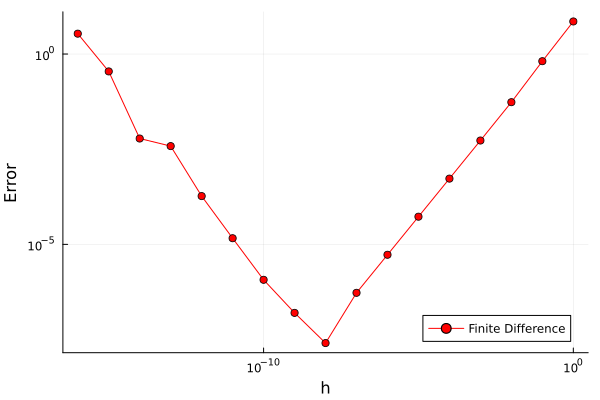

In [5]:
# (a) finite difference formula
using Plots

function f(x)
    return tan(x)
end

function turunan_eksak(x)
    return sec(x)^2
end

function finite_difference(x, h)
    return (f(x + h) - f(x)) / h
end

function errors(approx, nilai_eksak)
    return abs(approx - nilai_eksak)
end

function tampil_finite()
    nilai_x = 1.0
    nilai_eksak = turunan_eksak(nilai_x)

    nilai_h = [10.0^(-k) for k in 0:16]
    error_finite = []

    for h in nilai_h
        approx = finite_difference(nilai_x, h)
        error = errors(approx, nilai_eksak)
        push!(error_finite, error)
    end

    plot(nilai_h, error_finite, xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error",
         label="Finite Difference", color=:red, legend=:bottomright, marker=:circle)
end

tampil_finite()

__Penjelasan:__

Dari grafik yang tersebut, dapat dilihat bahwa terdapat penurunan kesalahan seiring dengan penurunan nilai $h$, namun tidak selalu ada nilai minimum yang jelas. Kesalahan dapat bervariasi tergantung pada fungsi dan titik evaluasi yang digunakan. Selain itu, aturan $h \approx \sqrt{e_{mach}}$ dirancang untuk menghindari ketidakstabilan numerik dan kehilangan presisi. Dalam program ini, dapat dibandingkan nilai-nilai $h$ yang diuji dengan $\sqrt{e_{mach}}$ untuk melihat apakah grafik kesalahan menunjukkan penurunan yang signifikan pada $h$ di sekitar nilai ini. Jika $h$ terlalu kecil, kesalahan pembulatan akan terjadi, sedangkan jika $h$ terlalu besar, kesalahan numerik mungkin muncul. 

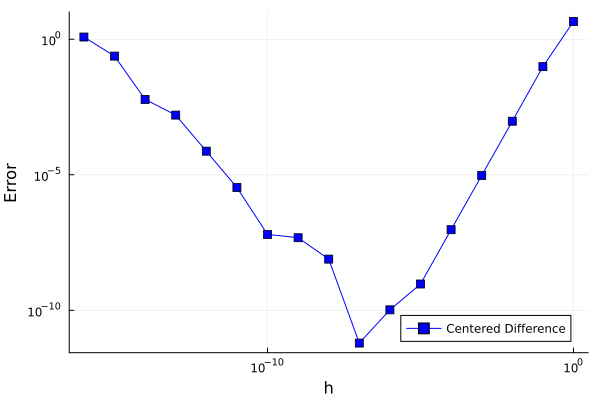

In [7]:
# (b)  centered difference approximation
using Plots

function centered_difference(x, h)
    return (f(x + h) - f(x - h)) / (2 * h)
end

function tampil_centered()
    nilai_x = 1.0
    nilai_eksak = turunan_eksak(nilai_x)

    nilai_h = [10.0^(-k) for k in 0:16]
    error_central = []

    for h in nilai_h
        approx = centered_difference(nilai_x, h)
        error = errors(approx, nilai_eksak)
        push!(error_central, error)
    end

    plot(nilai_h, error_central, xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error",
         label="Centered Difference", color=:blue, legend=:bottomright, marker=:rect)
end

tampil_centered()

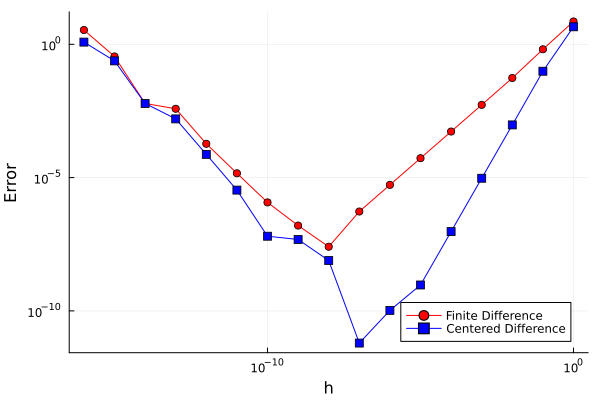

In [8]:
# Jika kedua grafik digabung maka akan seperti berikut 

function tampil_kombo()
    nilai_x = 1.0
    nilai_eksak = turunan_eksak(nilai_x)

    nilai_h = [10.0^(-k) for k in 0:16]
    error_finite = []
    error_central = []

    for h in nilai_h
        approxf = finite_difference(nilai_x, h)
        errorf = errors(approxf, nilai_eksak)
        push!(error_finite, errorf)

        approxc = centered_difference(nilai_x, h)
        errorc = errors(approxc, nilai_eksak)
        push!(error_central, errorc)
    end

    plot(nilai_h, error_finite, xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error", 
        label="Finite Difference", color=:red, legend=:bottomright, marker=:circle)

    plot!(nilai_h, error_central, label="Centered Difference", color=:blue, legend=:bottomright, marker=:rect)
end

tampil_kombo()

<hr style="border:2px solid black"> </hr>

#### __1.10__
Write a program to solve the quadratic equation $ax^2 + bx + c = 0$ using standard quadratic formula 
$$x = \frac{-b +- \sqrt{b^2 - 4ac}}{2a} $$
or the alternative formula
$$x = \frac{2c}{-b -+ \sqrt{b^2 - 4ac}} $$

Your program should accept values for the coefficients $a, b,$ and $c$ as input and produce the two roots of the equation as output. Your program should detect when the roots are not real, but need not use complex arithmetic explicitly (for example, you could return the real and imaginary parts of the complex conjugate roots in this case). You should guard against unnecessary overflow, underflow, and cancellation. When should you use each of the two formulas? Try to make your program robust when given unusual input values, such as $a = 0$ or $c = 0$, which otherwise would make one of the formulas fail. Any root that is within the range of the floating-point system should be computed accurately, even if the other is out of range. Test your program using the following values for the coefficients:

|$a$|$b$|$c$|
|--|--|--|
| $6$ | $5$ | $-4$ |
| $6 x 10^{154}$ | $5 x 10^{154}$ | $-4 x 10^{154}$ |
| $0$ | $1$ | $1$ |
| $1$ | $-10^{5}$ | $1$ |
| $1$ | $-4$ | $3.999999$ |
| $10^{-155}$ | $-10^{155}$ | $10^{155}$ |

In [9]:
function solver_kuadratik(a, b, c)
    # Kalau a = 0
    if a == 0
        println("Error: Koefisien 'a' harus bukan nol")
        return "Tak terdefinisi", "Tak terdefinisi"
    end
    diskriminan = b^2 - 4 * a * c
    # Kalau diskriminan positif
    if diskriminan >= 0
        akar_diskriminan = sqrt(diskriminan)
        x1 = (-b + akar_diskriminan) / (2 * a)
        x2 = (-b - akar_diskriminan) / (2 * a)
        return x1, x2
    else
    # Kalau diskriminan negatif
        riil = -b / (2 * a)
        imaginer = sqrt(abs(diskriminan)) / (2 * a)
        x1 = complex(riil, imaginer)
        x2 = conj(x1)
        return x1, x2
    end
end

function tampil()
    koefisien = [
        (6, 5, -4),
        (6e154, 5e154, -4e154),
        (0, 1, 1),
        (1, -1e5, 1),
        (1, -4, 3.999999),
        (1e-155, -1e155, 1e155),
    ]

    for (a, b, c) in koefisien
        println("Koefisien: a=$a, b=$b, c=$c")
        x1, x2 = solver_kuadratik(a, b, c)
        println("Akar 1: $x1")
        println("Akar 2: $x2")
        println("------------------------------------")
    end
end
tampil()

Koefisien: a=6, b=5, c=-4
Akar 1: 0.5
Akar 2: -1.3333333333333333
------------------------------------
Koefisien: a=6.0e154, b=5.0e154, c=-4.0e154
Akar 1: Inf
Akar 2: -Inf
------------------------------------
Koefisien: a=0, b=1, c=1
Error: Koefisien 'a' harus bukan nol
Akar 1: Tak terdefinisi
Akar 2: Tak terdefinisi
------------------------------------
Koefisien: a=1, b=-100000.0, c=1
Akar 1: 99999.99999
Akar 2: 1.0000003385357559e-5
------------------------------------
Koefisien: a=1, b=-4, c=3.999999
Akar 1: 2.00100000000007
Akar 2: 1.9989999999999302
------------------------------------
Koefisien: a=1.0e-155, b=-1.0e155, c=1.0e155
Akar 1: Inf
Akar 2: -Inf
------------------------------------


<hr style="border:2px solid black"> </hr>

#### __1.12__
$(a)$ Write a program to compute the mean $x_{bar}$ and standard deviation $σ$ of a finite sequence $x_{i}$. Your program should accept a vector $x$ of dimension $n$ as input and produce the mean and standard deviation of the sequence as output. For the standard deviation, try both the two-pass formula
$$σ = [\frac{1}{n-1} \sum_{i=1}^{n}{(x_{i} - x̄)^2}]^{1/2}$$

and the one-pass formula
$$σ = [\frac{1}{n-1} \sum_{i=1}^{n}{(x_{i}^2 - nx̄^2)}]^{1/2}$$

and compare the results for an input sequence of your choice.

$(b)$ Can you devise an input data sequence that dramatically illustrates the numerical difference between these two mathematically equivalent formulas? (Caution: Beware of taking the square root of a negative number.)

In [10]:
# (a)
function hitung_mean_stdev(x)
    n = length(x)
    # Menghitung mean(x̄)
    mean = sum(x) / n
    # Menghitung two-way standard deviation (σ)
    twoway_stdev = sqrt(sum(abs(xi - mean)^2 for xi in x) / (n - 1))
    # Menghitung one-way standard deviation (σ)
    oneway_stdev = sqrt(sum(abs(xi^2 - n * mean^2) for xi in x) / (n - 1))
    return mean, twoway_stdev, oneway_stdev
end

# (b)
data = [10, -2, 300, 0.004, -500, 1006]
mean, twoway_stdev, oneway_stdev = hitung_mean_stdev(data)

println("Mean(x̄): $mean")
println("Two-way Standard Deviation(σ): $twoway_stdev")
println("One-way Standard Deviation(σ): $oneway_stdev")

Mean(x̄): 135.66733333333335
Two-way Standard Deviation(σ): 498.3384889838098
One-way Standard Deviation(σ): 527.7877421822778


<hr style="border:2px solid black"> </hr>